<a href="https://colab.research.google.com/github/ixora99/NewsClassify/blob/master/new1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gensim
import sys


from sklearn.manifold import TSNE
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

!git clone https://github.com/ixora99/NewsClassify.git



Cloning into 'NewsClassify'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 12 (delta 2), reused 12 (delta 2), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [0]:
def classify(category,keys): #category는 1,2,3,4
  
  text = []
  with open("NewsClassify/resource/train.csv", encoding='utf-8') as file:
      line = file.readline()
      while line:
          if int(line[0]) == int(category):
              text.append(gensim.utils.simple_preprocess(line[2:]))
          line = file.readline()

  model = gensim.models.Word2Vec (text, size=10, window=10, min_count=2, workers=4)
  model.train(text, total_examples=len(text), epochs=100)
  
  embedding_clusters = []
  word_clusters = []
  for word in keys:
      embeddings = []
      words = []
      for similar_word, _ in model.wv.most_similar(word, topn=50):
          words.append(similar_word)
          embeddings.append(model.wv[similar_word])
      embedding_clusters.append(embeddings)
      word_clusters.append(words)
  return embedding_clusters, word_clusters


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    embedding_clusters = np.array(embedding_clusters)
    n, m, k = embedding_clusters.shape
    tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
    embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
    
    
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embeddings_en_2d, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, alpha = a, label = label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=300, bbox_inches='tight')
    plt.show()




In [20]:
key_business=['business', 'market', 'company', 'government']
a,b=classify(3,key_business)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


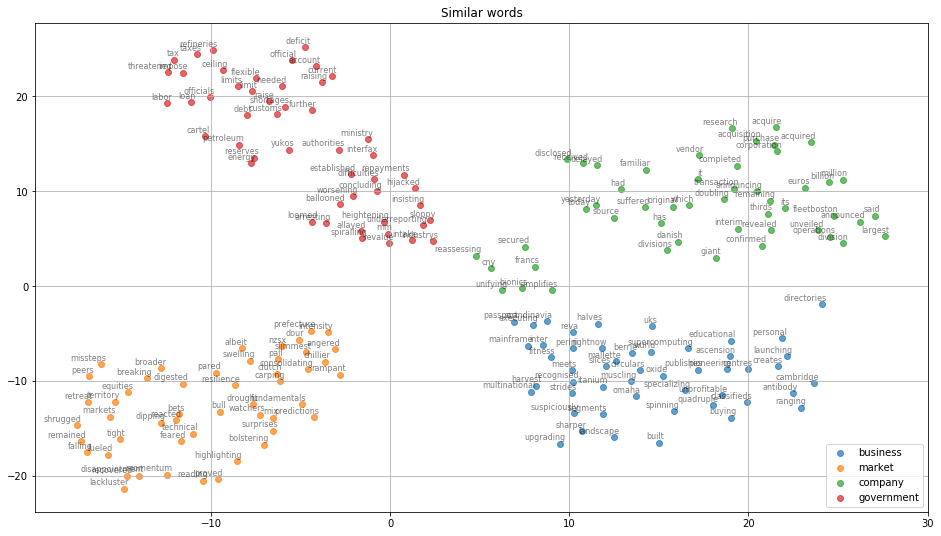

In [23]:
tsne_plot_similar_words('Similar words', key_business, a,b, 0.7, 'similar_words.png')
